<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Daniel_0706022210060_Week_6_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
#Load dataset dan tampilkan
df = pd.read_csv("https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#describe dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#mengisi missing value dengan modus, karena modus merupakan niai yang paling sering muncul.
for col in ['workclass', 'occupation', 'native.country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
#cek null value
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


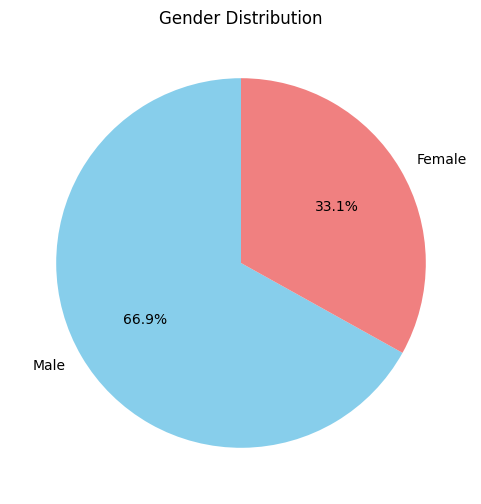

In [11]:
gender_counts = df['sex'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

# menunjukkan distribusi gender dari dataset yang ada.

<ipython-input-12-c5fd8c9a816f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income', y='age', data=average_age, palette='Set1')


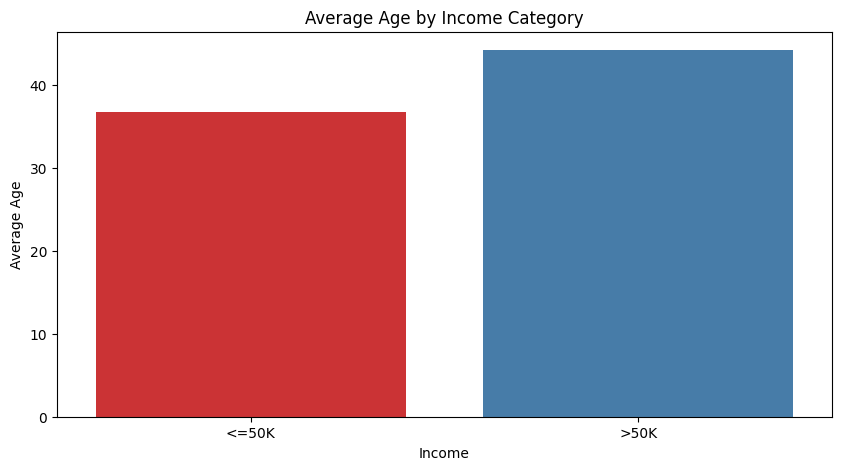

In [12]:
average_age = df.groupby('income')['age'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='income', y='age', data=average_age, palette='Set1')
plt.title('Average Age by Income Category')
plt.xlabel('Income')
plt.ylabel('Average Age')
plt.show()
# menunjukkan distribusi income berdasarkan umur.

In [14]:
label_encoder = LabelEncoder()
# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [16]:
#split X dan y
x=df.drop('income',axis=1)
y=df['income']

In [17]:
#train dan test data dengan test size 20% dan random state 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((26048, 14), (6513, 14))

In [18]:
#entropy
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [19]:
y_pred_entro = clf_entro.predict(x_test)

In [20]:
print('model accuracy score dengan criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

model accuracy score dengan criterion entropy: 0.8394


In [21]:
print('training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

training set score: 0.8399
test set score: 0.8394


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.798\nsamples = 26048\nvalue = [19744, 6304]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.993\nsamples = 10560\nvalue = [5799, 4761]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.915\nsamples = 7348\nvalue = [4922, 2426]'),
 Text(0.0625, 0.125, 'entropy = 0.878\nsamples = 6997\nvalue = [4917, 2080]'),
 Text(0.1875, 0.125, 'entropy = 0.108\nsamples = 351\nvalue = [5, 346]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.846\nsamples = 3212\nvalue = [877.0, 2335.0]'),
 Text(0.3125, 0.125, 'entropy = 0.909\nsamples = 2697\nvalue = [874, 1823]'),
 Text(0.4375, 0.125, 'entropy = 0.052\nsamples = 515\nvalue = [3, 512]'),
 Text(0.75, 0.625, 'x[10] <= 7073.5\nentropy = 0.468\nsamples = 15488\nvalue = [13945, 1543]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.399\nsamples = 15129\nvalue = [13933, 1196]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 13984\nvalue = [1328

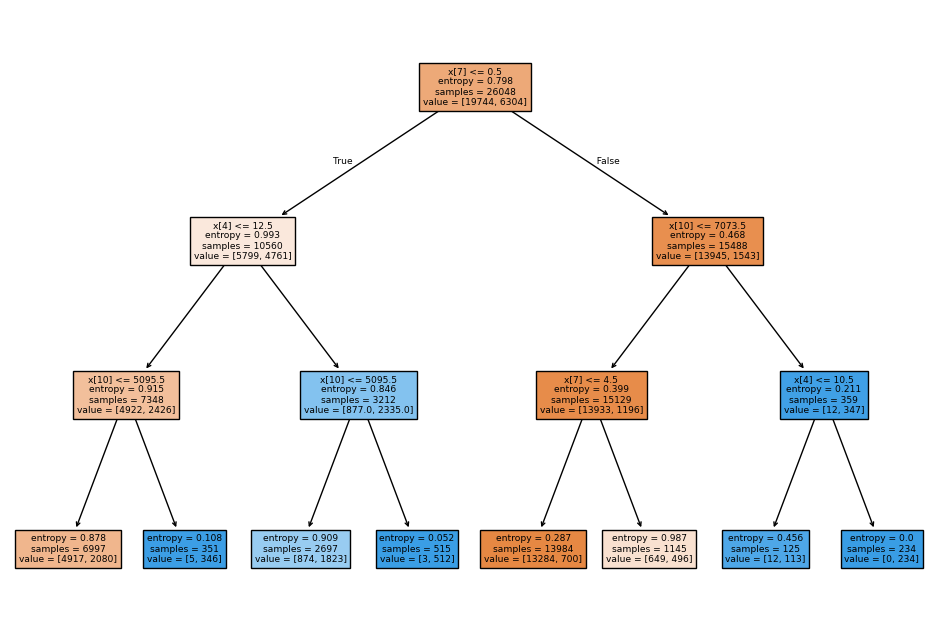

In [22]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)
#print decison tree nya

In [23]:
#gini
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(x_test)

In [25]:
print('model accuracy score dengan criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

model accuracy score dengan criterion gini: 0.8397


In [26]:
print('training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

training set score: 0.8399
test set score: 0.8397


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.367\nsamples = 26048\nvalue = [19744, 6304]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 10560\nvalue = [5799, 4761]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.442\nsamples = 7348\nvalue = [4922, 2426]'),
 Text(0.0625, 0.125, 'gini = 0.418\nsamples = 6997\nvalue = [4917, 2080]'),
 Text(0.1875, 0.125, 'gini = 0.028\nsamples = 351\nvalue = [5, 346]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.397\nsamples = 3212\nvalue = [877.0, 2335.0]'),
 Text(0.3125, 0.125, 'gini = 0.438\nsamples = 2697\nvalue = [874, 1823]'),
 Text(0.4375, 0.125, 'gini = 0.012\nsamples = 515\nvalue = [3, 512]'),
 Text(0.75, 0.625, 'x[10] <= 7073.5\ngini = 0.179\nsamples = 15488\nvalue = [13945, 1543]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.146\nsamples = 15129\nvalue = [13933, 1196]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 13984\nvalue = [13284, 700]'),
 Text(0.6875, 0.125, '

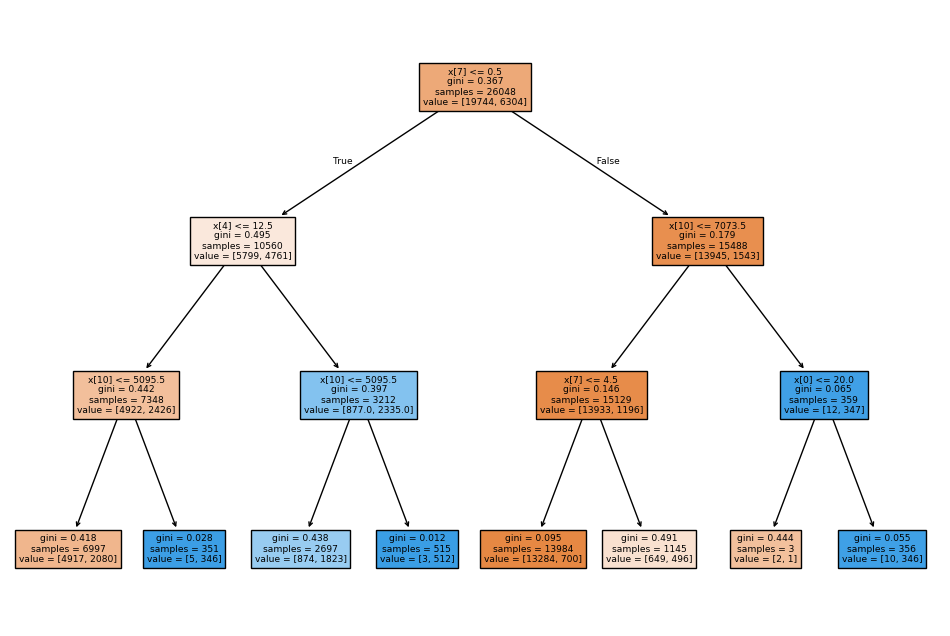

In [27]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)
#print decison tree nya

In [28]:
#naive bays
x_train = x_train.dropna()
y_train = y_train[x_train.index]

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [29]:
nb_y_pred = nb_classifier.predict(x_test)

In [30]:
print('accuracy score dengan GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))

accuracy score dengan GaussianNB: 0.8


In [31]:
gaus = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', gaus)

Confusion matrix GaussianNB: 
 [[4716  260]
 [1078  459]]


In [32]:
#classification report GaussianNB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4976
           1       0.64      0.30      0.41      1537

    accuracy                           0.79      6513
   macro avg       0.73      0.62      0.64      6513
weighted avg       0.77      0.79      0.77      6513



In [33]:
print("Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,79 / 79%.")

Dari laporan tersebut, kami menyimpulkan bahwa skor akurasi adalah 0,79 / 79%.


In [34]:
#logistic regression
classifier = LogisticRegression(max_iter=200)
classifier.fit(x_train, y_train)
#train model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [35]:
y_pred_log = classifier.predict(x_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama

       y_test  y_pred
14160       0       0
27048       0       0
28868       0       0
5667        0       0
7827        0       0


In [36]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.8044


In [37]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#menampilkan confusion matrix

Confusion Matrix:
 [[4671  305]
 [ 969  568]]


In [38]:
print (classification_report (y_test, y_pred_log))
#menampilkan classification report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4976
           1       0.65      0.37      0.47      1537

    accuracy                           0.80      6513
   macro avg       0.74      0.65      0.68      6513
weighted avg       0.79      0.80      0.78      6513



In [ ]:
print("Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,80 / 80%.")